In [2]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# Data Cleanup
df["job_posted_data"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
import seaborn as sns

In [4]:
# Only get DA jobs in the US
df_DA_US = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy()

# Drop NaN values from the salary_year_avg column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=["salary_year_avg"])

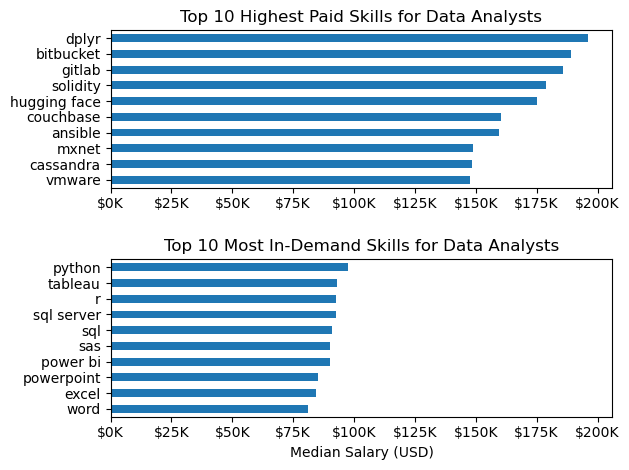

In [5]:
df_DA_US = df_DA_US.explode("job_skills")

df_DA_top_pay = df_DA_US.groupby("job_skills")["salary_year_avg"].agg(["count", "median"])
df_DA_top_pay = df_DA_top_pay.sort_values(by="median", ascending=False).head(10)
df_DA_skills = df_DA_US.groupby("job_skills")["salary_year_avg"].agg(["count", "median"])
df_DA_skills = df_DA_skills.sort_values(by="count", ascending=False).head(10)\
.sort_values(by="median", ascending=False)   

fig, ax = plt.subplots(2, 1)

df_DA_top_pay[::-1].plot(kind="barh", y="median", ax=ax[0], legend=False)
# ax[0].invert_yaxis() # another option of inverting
ax[0].set_title("Top 10 Highest Paid Skills for Data Analysts")
ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))

df_DA_skills[::-1].plot(kind="barh", y="median", ax=ax[1], legend=False)
# ax[1].invert_yaxis() # another option of inverting
ax[1].set_title("Top 10 Most In-Demand Skills for Data Analysts")
ax[1].set_ylabel("")
ax[1].set_xlabel("Median Salary (USD)")
ax[1].set_xlim(ax[0].get_xlim()) # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))
# ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: "${0:g}K".format(x/1000))) # Alternative

fig.tight_layout(h_pad=2)
plt.show()

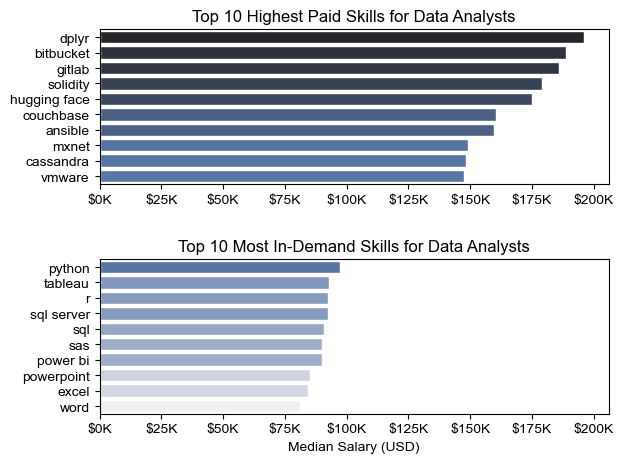

In [6]:
fig, ax = plt.subplots(2, 1)
sns.set_theme(style="ticks")

# df_DA_top_pay[::-1].plot(kind="barh", y="median", ax=ax[0], legend=False)
sns.barplot(data=df_DA_top_pay, x="median", y=df_DA_top_pay.index, ax=ax[0], hue="median", palette="dark:b_r") 
ax[0].legend().remove()
ax[0].set_title("Top 10 Highest Paid Skills for Data Analysts")
ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))

# df_DA_skills[::-1].plot(kind="barh", y="median", ax=ax[1], legend=False)
sns.barplot(data=df_DA_skills, x="median", y=df_DA_skills.index, ax=ax[1], hue="median", palette="light:b") 
ax[1].legend().remove()
ax[1].set_title("Top 10 Most In-Demand Skills for Data Analysts")
ax[1].set_ylabel("")
ax[1].set_xlabel("Median Salary (USD)")
ax[1].set_xlim(ax[0].get_xlim()) # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))
# ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: "${0:g}K".format(x/1000))) # Alternative

fig.tight_layout(h_pad=2)
plt.show()

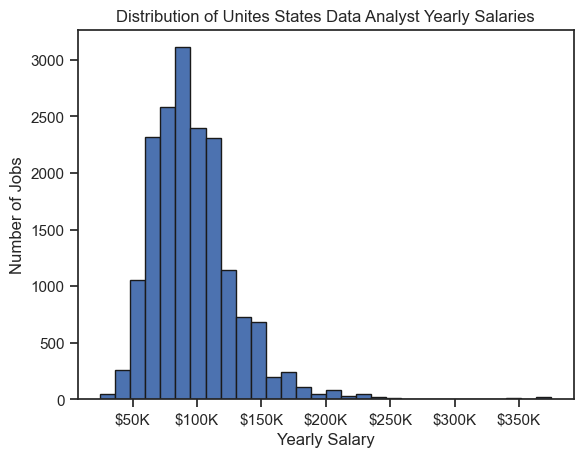

In [7]:
df_DA_US["salary_year_avg"].plot(kind="hist", bins=30, edgecolor=["k"])

plt.title("Distribution of Unites States Data Analyst Yearly Salaries")
plt.xlabel("Yearly Salary")
plt.ylabel("Number of Jobs")
ax = plt.gca() # gca=get current access
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))
plt.show()

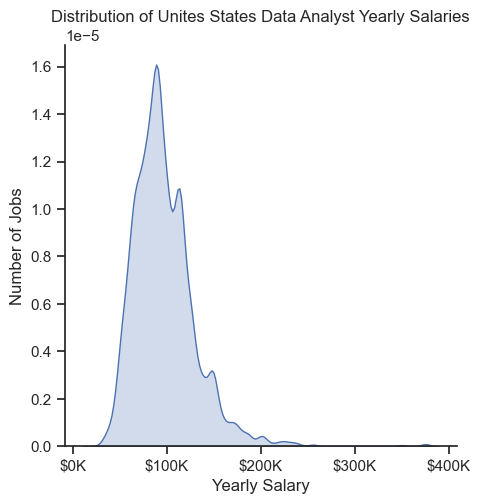

In [12]:
# df_DA_US["salary_year_avg"].plot(kind="hist", bins=30, edgecolor=["k"])
# sns.set_theme(style="ticks") # No need, it's already in there
sns.displot(data=df_DA_US["salary_year_avg"], kind="kde", fill=True)

plt.title("Distribution of Unites States Data Analyst Yearly Salaries")
plt.xlabel("Yearly Salary")
plt.ylabel("Number of Jobs")
ax = plt.gca() # gca=get current access
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))

plt.show()

C:\Users\nsars\AppData\Local\Temp\ipykernel_21644\3207873049.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


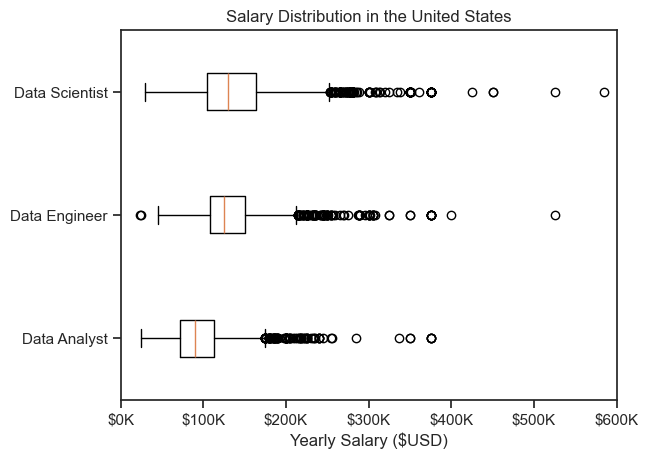

In [10]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# filter for the job titles and country
df_US = df[(df["job_title_short"].isin(job_titles)) & (df["job_country"]\
                     == "United States")].dropna(subset=["salary_year_avg"])

# list of salaries for each job title
job_list = [df_US[df_US["job_title_short"] == job_title]["salary_year_avg"] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title("Salary Distribution in the United States")
plt.xlabel("Yearly Salary ($USD)")
plt.xlim(0, 600000)
ticks_x = plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

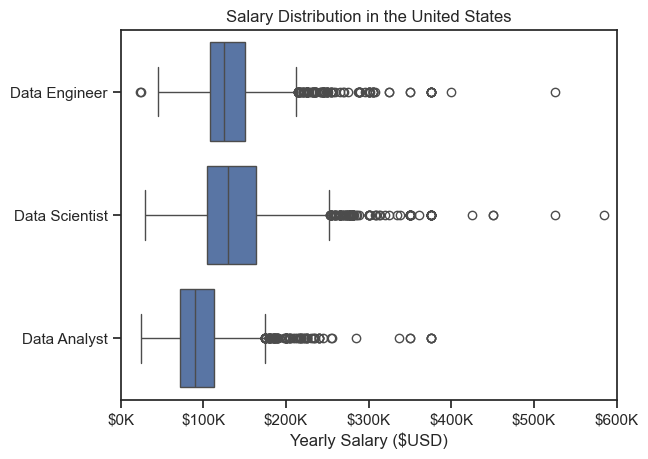

In [18]:
# plt.boxplot(job_list, labels=job_titles, vert=False)

# Seaborn with Box Plots
sns.boxplot(data=df_US, x="salary_year_avg", y="job_title_short")
plt.title("Salary Distribution in the United States")
plt.xlabel("Yearly Salary ($USD)")
plt.ylabel("")
plt.xlim(0, 600000)
ticks_x = plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()